## Abalone Case Study

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

### Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 
You have to predict the rings of each abalone which will lead us to the age of that abalone.

#### Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#Lets check whether there are null values or not
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No null value present in the dataset.

In [5]:
#Lets check the  Datatypes of each column
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

### Explore the Data
Let's actually look at the data now.

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Two things stands out: first, the minimum height is 0, which must be a typo. Second, the smallest weight is (after rescaling) significantly less than a gram. Let's sort the first few values sorted by height.

In [7]:
df.sort_values(by=["Height"]).head(15)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3996,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6
1257,I,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9
3902,I,0.160,0.120,0.020,0.0180,0.0075,0.0045,0.0050,4
694,I,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,4
1987,I,0.160,0.110,0.025,0.0195,0.0075,0.0050,0.0060,4
2381,M,0.155,0.115,0.025,0.0240,0.0090,0.0050,0.0075,5
3190,I,0.200,0.145,0.025,0.0345,0.0110,0.0075,0.0100,5


It's just two entries with height 0, so I think it's safe to drop them. While we're here entry 1174 is a clear outlier. Let's handle that later.

In [8]:
df = df.loc[df["Height"] != 0.0]

In [9]:
df.sort_values(by=["Whole weight"]).head(15)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
2114,I,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
3899,I,0.140,0.105,0.035,0.0145,0.0050,0.0035,0.0050,4
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
526,M,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3
696,I,0.155,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4


Looking at this table I suspect that the low weight entry is real, since it only has one ring and has small length, diameter, and height.

Let's construct a correlation matrix and a heatmap for our data.

In [10]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
Diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
Height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
Whole weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
Shucked weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
Viscera weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
Shell weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
Rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


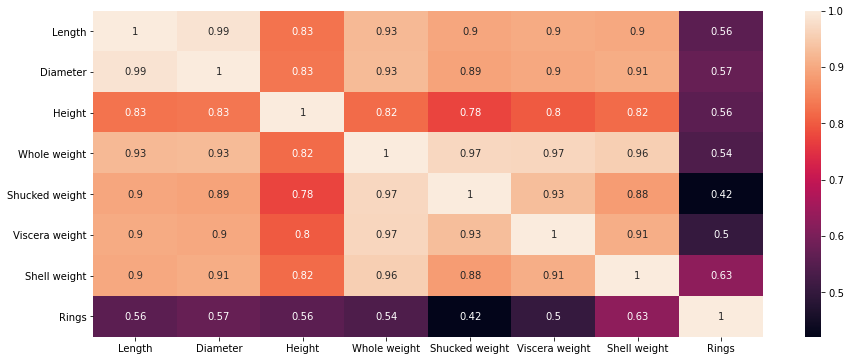

In [11]:
plt.figure(figsize = (15,6))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    annot=True  
)

Almost everything is strongly correlated with everything else, except ring count! :( Assuming body proportions don't vary much between different abalone this makes sense.

All of the features  associated with weight are pretty much perfectly correlated with each other, with pearson coefficients > 0.95 for whole weight. This isn't surprising since they're just the weights of different parts of the same abalone. I think we can safely drop the shucked weight, viscera weight, and shell weight and just keep whole weight (PCA is probably overkill).

Length and diameter are just about perfectly correlated. The circumfrence of an ellipse is proportional to its length with the constant of proportionality determined by its eccentricity, so no surprise there. Height is strongly correlated with the remaining features, but not as strongly as, say, length with diameter. We'll replace these three features with their geometric mean. While keeping length, diameter, and height can only help with prediction, I think the benefits gained of an easier to interpret model outweight the marginal gain of predictability from keeping them.

In [12]:
#Lets describe the abalone dataset
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [13]:
# checkig the values of sex

df['Sex'].value_counts()

M    1528
I    1340
F    1307
Name: Sex, dtype: int64

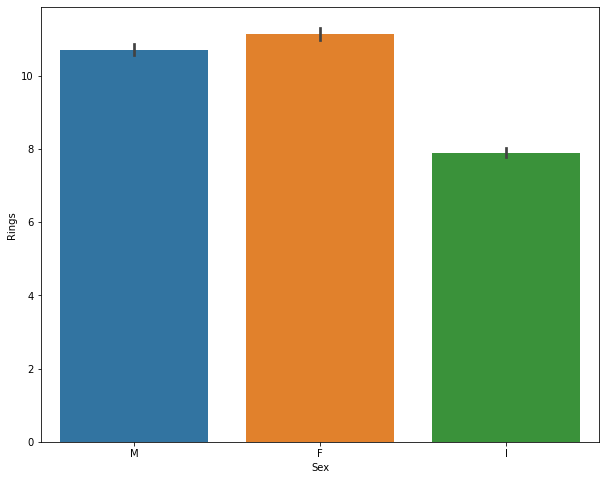

In [14]:
#Lets draw a bar graph for Rings and Sex
plt.figure(figsize=(10,8))
sns.barplot(x="Sex",y="Rings",data=df)
plt.show()

Text(0.5, 1.0, 'Rings vs length and sex')

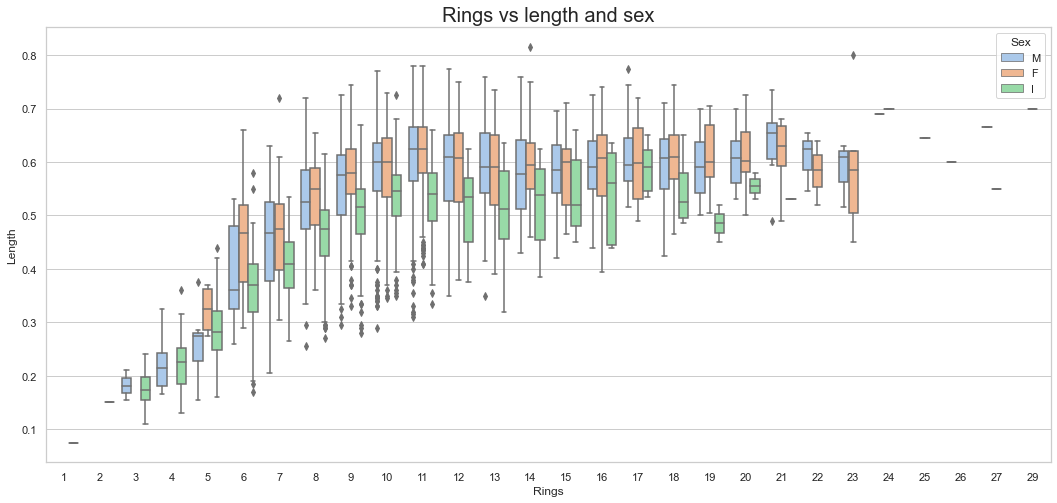

In [15]:
# plotting a hue plot
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (18, 8)
sns.boxplot(df['Rings'], df['Length'], hue = df['Sex'], palette = 'pastel')
plt.title('Rings vs length and sex', fontsize = 20)

Here we can see that there are some outliers present in the dataset

Text(0.5, 1.0, 'Rings vs diameter and sex')

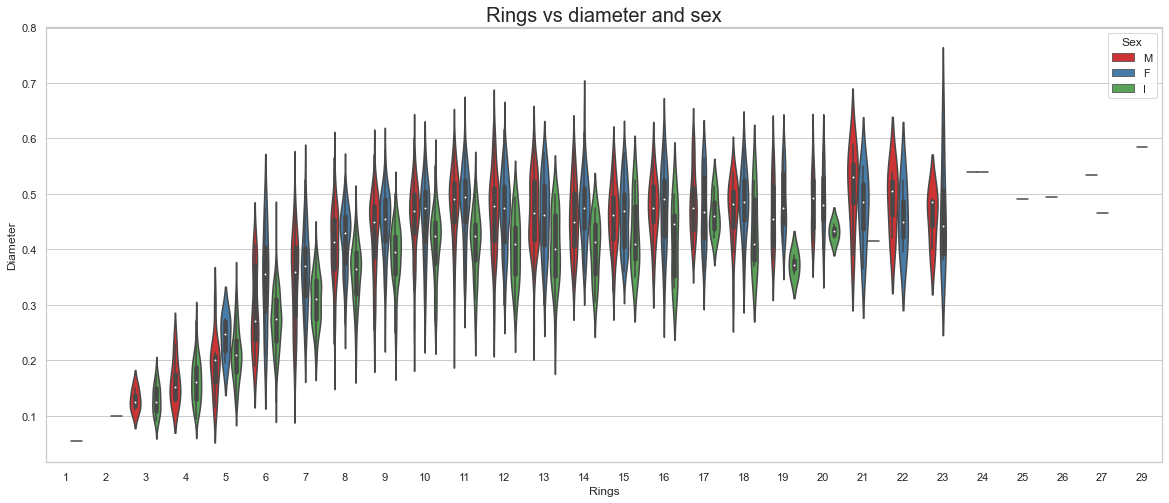

In [16]:
# rings vs diameter and sex

plt.rcParams['figure.figsize'] = (20, 8)
sns.violinplot(df['Rings'], df['Diameter'], hue = df['Sex'], palette = 'Set1')
plt.title('Rings vs diameter and sex', fontsize = 20)

With the help of violin plot we can see that the rings according to the Sex and diameter(perpendicular to length)

Text(0.5, 1.0, 'Rings vs height and sex')

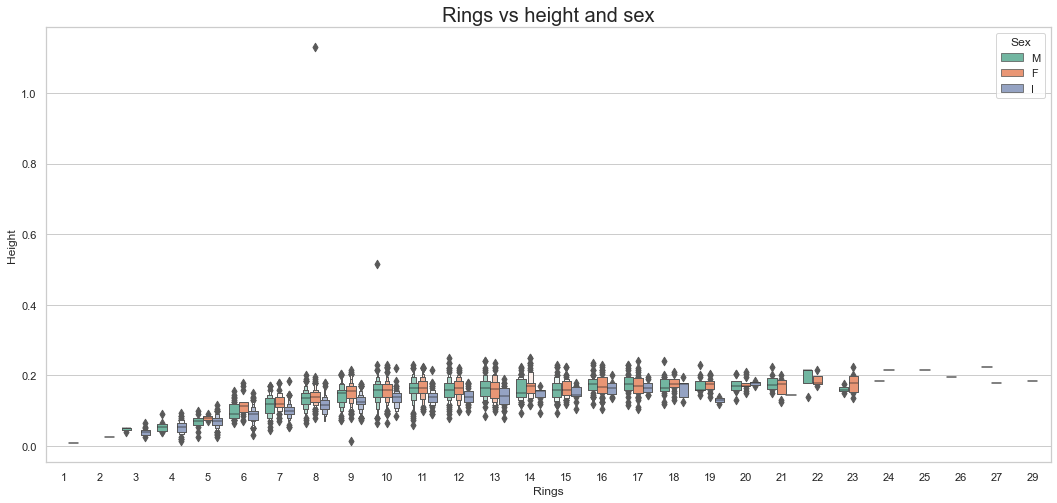

In [17]:
# rings vs height and sex

plt.rcParams['figure.figsize'] = (18, 8)
sns.boxenplot(df['Rings'], df['Height'], hue = df['Sex'], palette = 'Set2')
plt.title('Rings vs height and sex', fontsize = 20)

Checking the Rings(age) According to the Sex and Height of abalone and here we can see some outliers are very very far

Text(0.5, 1.0, 'Rings vs weight')

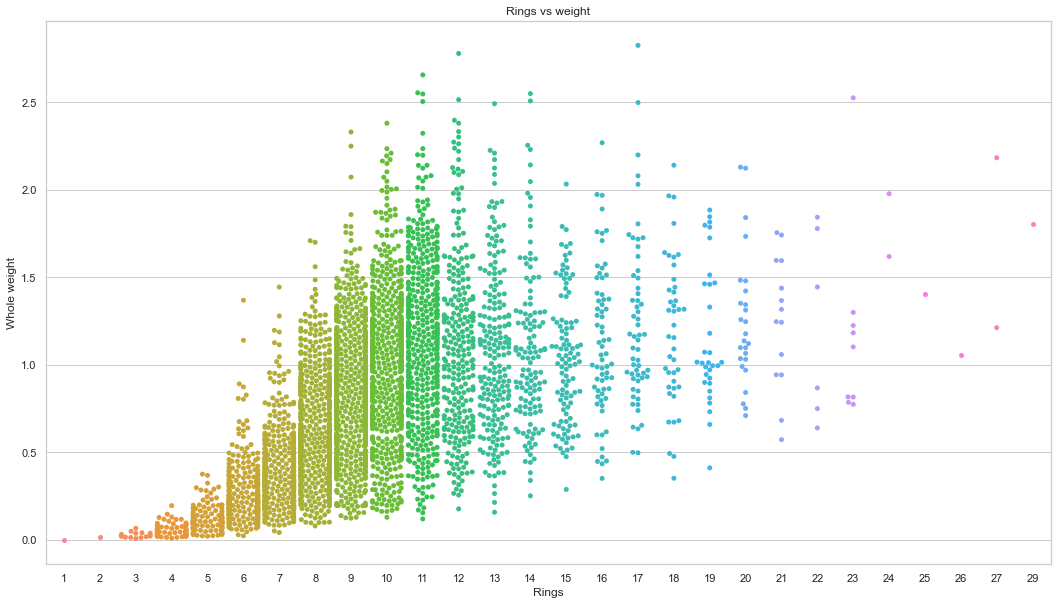

In [18]:
# ring vs weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Whole weight'])
plt.title('Rings vs weight')

Here we can see the Rings( age)  according to the whole weight of the abalone and we can see that most of the rings are between 8 to 11 rings

Text(0.5, 1.0, 'Rings vs shucked weight')

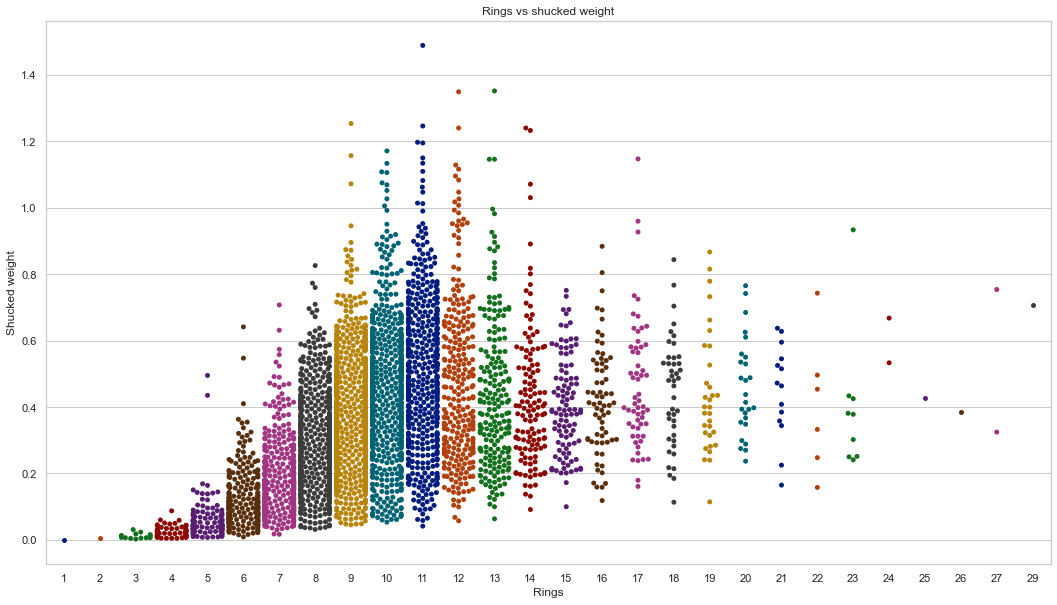

In [19]:
# ring vs shucked weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(df['Rings'], df['Shucked weight'], palette = 'dark')
plt.title('Rings vs shucked weight')

Here we can see the Rings( age) according to the weight of meat i,e.(Shucked weight)

Text(0.5, 1.0, 'Rings vs Viscera Weight')

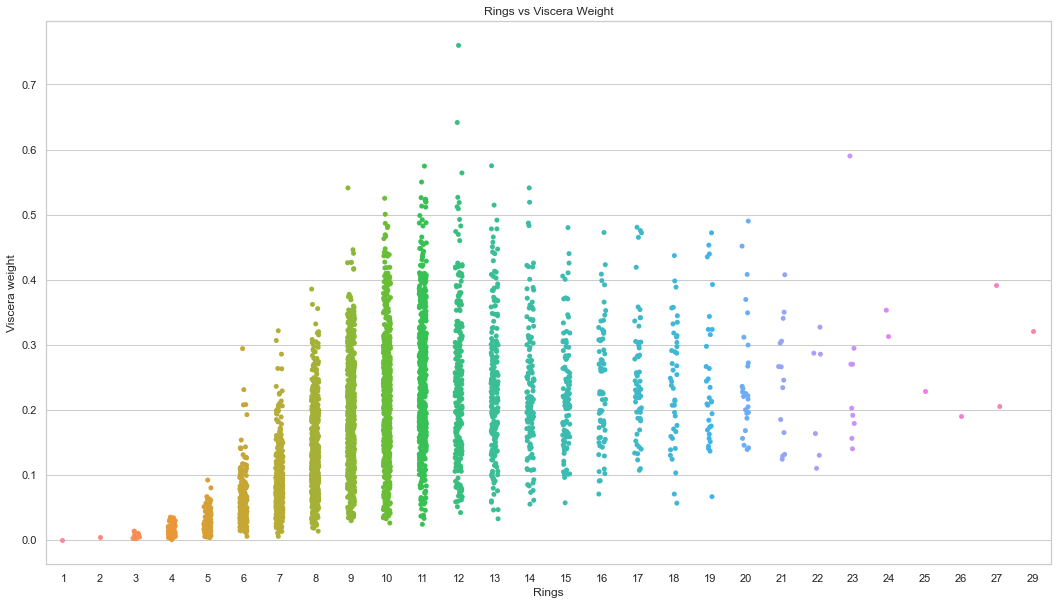

In [20]:
# ring vs viscera weight

plt.rcParams['figure.figsize'] = (18, 10)
sns.stripplot(df['Rings'], df['Viscera weight'])
plt.title('Rings vs Viscera Weight')

Here we can see the Rings( age) according to the Viscera weight(gut weight (after bleeding)) and most of the rings are in between 10 to 13

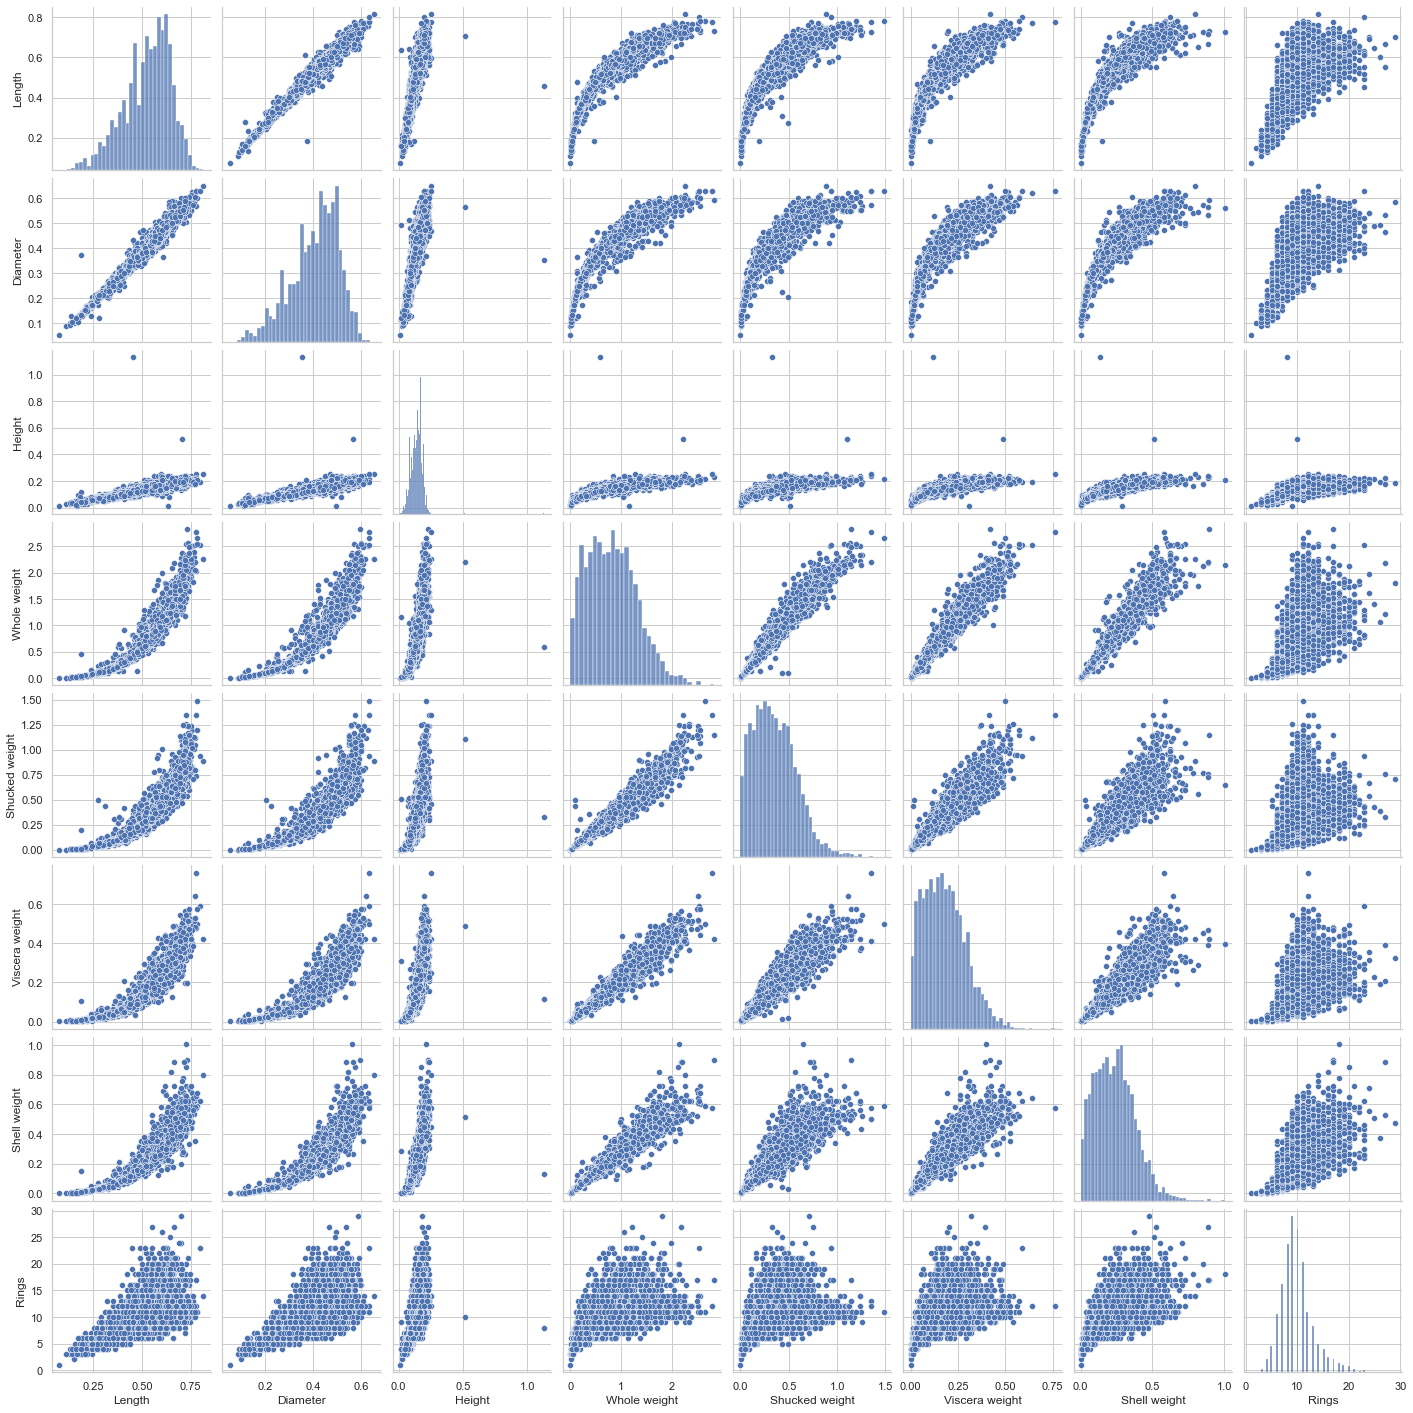

In [21]:
sns.pairplot(df)

In [22]:
import math as m
df['Volume apprx'] = df['Length'] * df['Diameter'] * df['Height'] * m.pi * 4/3
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Volume apprx
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.066087
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.034966
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0.125877
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.084090
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.028199
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0.175725
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.146800
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.244730
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0.190459


As little difference between Male and Female it would be useful to use Adult/Infant flag for age prediction

In [23]:
# df['Age category'] = np.where(df['Sex'] == 'I','Infant', 'Adult')
df['Age category'] = np.where(df['Sex'] == 'I',0, 1)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Volume apprx,Age category
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.066087,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.034966,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0.125877,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.084090,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.028199,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0.175725,1
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.146800,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.244730,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0.190459,1


In [24]:
df=df.drop('Sex',axis=1)

### Removing Outliers

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [26]:
#Lets check the skewness
df.skew()
#From below output it is clear that skewness exist

Length           -0.625223
Diameter         -0.601660
Height           -0.248509
Whole weight      0.326509
Shucked weight    0.454668
Viscera weight    0.433292
Shell weight      0.341021
Rings             0.726752
Volume apprx      0.377289
Age category     -0.730831
dtype: float64

In [27]:

#before treating skewnees lets divide the dataset into input and output
x=df.drop(columns=["Rings"])
y=df[["Rings"]]

In [28]:
#Now lets remove the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [29]:
#lets again check the skewness
x.skew()

Length           -0.122853
Diameter         -0.084150
Height           -0.248509
Whole weight      0.326509
Shucked weight    0.454668
Viscera weight    0.433292
Shell weight      0.341021
Volume apprx      0.377289
Age category     -0.730831
dtype: float64

In [30]:
x.shape

(4025, 9)

In [31]:
y.shape

(4025, 1)

### Now, splitting the data for Training & Testing

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=46)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2817, 9)
(1208, 9)
(2817, 1)
(1208, 1)


In [36]:
LR=LinearRegression()
rf=RandomForestRegressor(n_estimators=50)
knn=KNeighborsRegressor(n_neighbors=19)
dtc=DecisionTreeRegressor()
ls=Lasso(alpha=0.01)
rd=Ridge(alpha=0.01)

In [37]:
model=[LR,rf,knn,dtc,ls,rd]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print("The Mean absolute error value of ",m ,"is. ")
    print("Mean absolute error: %.2f" % mean_absolute_error(y_test,predm))
    print()
    print("The Mean squared error value of ",m ,"is. ")
    print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test,predm))
    print()
    print("The r2_score value of ",m ,"is. ")
    print("R2-score of : %.2f" % r2_score(y_test,predm))
    print()
    print("Now check with Cross validation\n")
    
    score=cross_val_score(m,x,y,cv=10)
    print("The score after cross_validation : ",score)
    print("The Mean score after cross_validation : ",score.mean())
    print('\n')

The Mean absolute error value of  LinearRegression() is. 
Mean absolute error: 1.46

The Mean squared error value of  LinearRegression() is. 
Residual sum of squares (MSE): 3.90

The r2_score value of  LinearRegression() is. 
R2-score of : 0.54

Now check with Cross validation

The score after cross_validation :  [0.55657907 0.38136409 0.32407229 0.16066823 0.33204197 0.49529427
 0.42765167 0.43949975 0.50675819 0.50530688]
The Mean score after cross_validation :  0.4129236416474343


The Mean absolute error value of  RandomForestRegressor(n_estimators=50) is. 
Mean absolute error: 1.46

The Mean squared error value of  RandomForestRegressor(n_estimators=50) is. 
Residual sum of squares (MSE): 4.01

The r2_score value of  RandomForestRegressor(n_estimators=50) is. 
R2-score of : 0.53

Now check with Cross validation

The score after cross_validation :  [0.48250035 0.38750061 0.3819473  0.08985842 0.29352835 0.45945631
 0.53807831 0.41105156 0.57404011 0.47353109]
The Mean score after c

### Conclusion:

Minimum difference in r2 score and cross validation score is for KNN  , so this is our best model as it's r2_score is 0.52 and after cross-validation it's score is : 0.46. 

## Hyper parameter tuning

In [38]:
from sklearn.model_selection import GridSearchCV
parameters = [{"n_neighbors":range(1,40),
              "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
              "weights": ['uniform','distance'],
              "n_jobs":range(1,10)
             }]
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model,param_grid=parameters,cv=5,scoring='r2')

# Fit it to the data
grid.fit(x_train,y_train)

#Print the tuned parameters and score
print("Tuned KNeighborsRegressor Parameters: {}".format(grid.best_params_))
print("Best score is {}".format(grid.best_score_))

Tuned KNeighborsRegressor Parameters: {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 24, 'weights': 'distance'}
Best score is 0.5139472783401217


### Final modelling and evaluating using Best Parameteres.

In [39]:
m=KNeighborsRegressor(algorithm= 'auto', n_jobs= 1, n_neighbors = 24, weights= 'distance')
m.fit(x_train,y_train)
predm=m.predict(x_test)
print("The Mean absolute error value of ",m ,"is. ")
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,predm))
print()
print("The Mean squared error value of ",m ,"is. ")
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(y_test,predm))
print()
print("The r2_score value of ",m ,"is. ")
print("R2-score of : %.2f" % r2_score(y_test,predm))
print()
print("Now check with Cross validation\n")
    
score=cross_val_score(m,x,y,cv=10)
print("The score after cross_validation : ",score)
print("The Mean score after cross_validation : ",score.mean())

The Mean absolute error value of  KNeighborsRegressor(n_jobs=1, n_neighbors=24, weights='distance') is. 
Mean absolute error: 1.42

The Mean squared error value of  KNeighborsRegressor(n_jobs=1, n_neighbors=24, weights='distance') is. 
Residual sum of squares (MSE): 3.99

The r2_score value of  KNeighborsRegressor(n_jobs=1, n_neighbors=24, weights='distance') is. 
R2-score of : 0.53

Now check with Cross validation

The score after cross_validation :  [0.44641591 0.33077681 0.44896309 0.37381928 0.46340131 0.44189572
 0.58424103 0.4210354  0.61510161 0.52389892]
The Mean score after cross_validation :  0.4649549096740241


### Final conclusion:

The final model has an R2score of 0.53.

### Saving the model

In [41]:
#saving the model
model=joblib.dump(m,'knnmodel.obj')

###  Result:

In [43]:
loaded_model= joblib.load('knnmodel.obj')
result=loaded_model.score(x_test,y_test)
print(result)

0.5326568127226404
